In [2]:
!pip install numpy pandas

In [40]:
import numpy as np
import pandas as pd

In [41]:
data = pd.read_csv('reorganized_dataset.csv')
data.head()

,Gender,Age Group,Na (mmol/L),K (mmol/L),Cl (mmol/L),Glucose Category
0,Female,0-25,135.819438,4.320476,101.768052,Normal
1,Female,0-25,142.952460,3.729778,104.558849,Normal
2,Female,0-25,136.183407,4.599861,102.856966,Normal
3,Female,0-25,143.322534,4.124567,104.474054,Normal
4,Female,0-25,135.826704,4.020621,99.508183,Normal


In [42]:
data.isnull().sum()

Gender              0
Age Group           0
Na (mmol/L)         0
K (mmol/L)          0
Cl (mmol/L)         0
Glucose Category    0
dtype: int64

In [43]:
data['Glucose Category'].value_counts()

Glucose Category
Normal           6000
Hypoglycemia     6000
Hyperglycemia    6000
Name: count, dtype: int64

In [44]:
!pip install matplotlib seaborn scikit-learn

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [46]:
label_encoders = {}
for col in ['Gender', 'Age Group', 'Glucose Category']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("\nEncoded Data:")
print(data.head())



Encoded Data:
   Gender  Age Group  Na (mmol/L)  K (mmol/L)  Cl (mmol/L)  Glucose Category
0       0          0   135.819438    4.320476   101.768052                 2
1       0          0   142.952460    3.729778   104.558849                 2
2       0          0   136.183407    4.599861   102.856966                 2
3       0          0   143.322534    4.124567   104.474054                 2
4       0          0   135.826704    4.020621    99.508183                 2


In [47]:
X = data.drop('Glucose Category', axis=1)
y = data['Glucose Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled features prepared.")



Scaled features prepared.


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data split into train and test sets.")


Data split into train and test sets.


In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model training complete.")


Random Forest model training complete.


In [50]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders['Glucose Category'].classes_)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

Hyperglycemia       1.00      1.00      1.00      1200
 Hypoglycemia       1.00      1.00      1.00      1200
       Normal       1.00      1.00      1.00      1200

     accuracy                           1.00      3600
    macro avg       1.00      1.00      1.00      3600
 weighted avg       1.00      1.00      1.00      3600



Text(0.5, 1.0, 'Confusion Matrix')

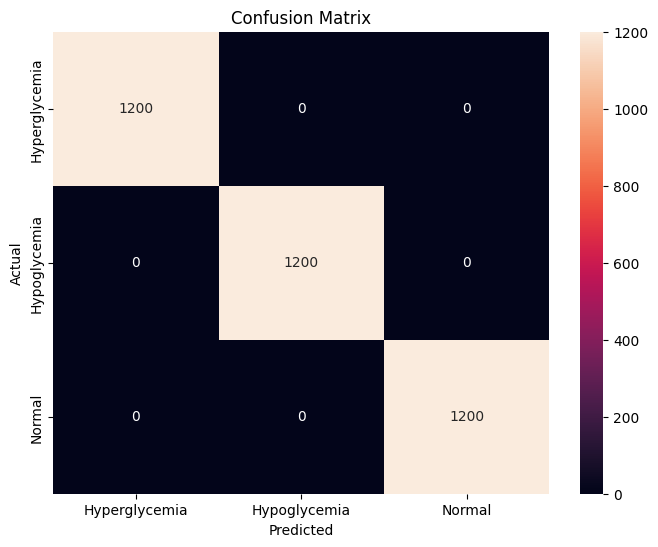

In [51]:
# confusion matrix without visualization with annotations
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoders['Glucose Category'].classes_, yticklabels=label_encoders['Glucose Category'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


In [52]:
# print training and testing accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)  
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


Train accuracy: 1.00
Test accuracy: 1.00


In [53]:
# Train different models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoders['Glucose Category'].classes_))
    print("\n")
    



Logistic Regression
Accuracy: 1.00
               precision    recall  f1-score   support

Hyperglycemia       1.00      1.00      1.00      1200
 Hypoglycemia       1.00      1.00      1.00      1200
       Normal       1.00      1.00      1.00      1200

     accuracy                           1.00      3600
    macro avg       1.00      1.00      1.00      3600
 weighted avg       1.00      1.00      1.00      3600




Support Vector Machine
Accuracy: 1.00
               precision    recall  f1-score   support

Hyperglycemia       1.00      1.00      1.00      1200
 Hypoglycemia       1.00      1.00      1.00      1200
       Normal       1.00      1.00      1.00      1200

     accuracy                           1.00      3600
    macro avg       1.00      1.00      1.00      3600
 weighted avg       1.00      1.00      1.00      3600




Decision Tree
Accuracy: 1.00
               precision    recall  f1-score   support

Hyperglycemia       1.00      1.00      1.00      1200
 Hyp

In [54]:
import joblib
joblib.dump(rf_model, 'glucose_model.pkl')
joblib.dump(scaler, 'glucose_scaler.pkl')
joblib.dump(label_encoders, 'glucose_label_encoders.pkl')


['glucose_label_encoders.pkl']